In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load,encoding="UTF-8")
clinical_df = pd.read_csv(clinical_trial_data_to_load, encoding="UTF-8")
# Combine the data into a single dataset
combined_df = mouse_df.merge(clinical_df, how="outer",on ="Mouse ID")
combined_df.head()
# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = combined_df.groupby(["Drug","Timepoint"])
mean_tumor = grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor)
# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = grouped["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
reform_tumor_df = tumor_df.reset_index()
reformat_data = reform_tumor_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
reformat_data
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


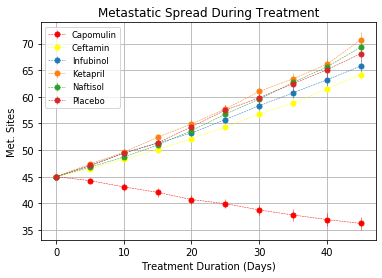

In [7]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(True)
time = np.arange(0,50,5)
capomulin = plt.errorbar(time, reformat_data["Capomulin"], label = "Capomulin", yerr=tumor_sem["Capomulin"], color = "r",marker="o", markersize = 5, linestyle="--", linewidth = .5)
ceftamin = plt.errorbar(time, reformat_data["Ceftamin"], label = "Ceftamin", yerr=tumor_sem["Ceftamin"], color = "yellow", marker="o", markersize = 5, linestyle="--", linewidth = .5)
infubinol = plt.errorbar(time, reformat_data["Infubinol"], label ="Infubinol",yerr=tumor_sem["Infubinol"], marker="o", markersize = 5, linestyle="--", linewidth = .5)
ketapril = plt.errorbar(time, reformat_data["Ketapril"], label ="Ketapril",yerr=tumor_sem["Ketapril"], marker="o", markersize = 5, linestyle="--", linewidth = .5)
naftisol = plt.errorbar(time, reformat_data["Naftisol"], label ="Naftisol",yerr=tumor_sem["Naftisol"], marker="o", markersize = 5, linestyle="--", linewidth = .5)
placebo = plt.errorbar(time, reformat_data["Placebo"], label ="Placebo",yerr=tumor_sem["Placebo"], marker="o", markersize = 5, linestyle="--", linewidth = .5)

plt.legend(handles=[capomulin, ceftamin, infubinol, ketapril, naftisol, placebo],loc="best", fontsize="small")
# Save the Figure
plt.savefig("Metsite_Response.png")
plt.show()

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_df.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
mouse_count = pd.DataFrame({"Mouse Count": mouse_count})
# Preview DataFrame
mouse_count

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [9]:
# Minor Data Munging to Re-Format the Data Frames
reform_mouse_df = mouse_count.reset_index()
reformated_mouse = reform_mouse_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
reformated_mouse
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


<function matplotlib.pyplot.show(*args, **kw)>

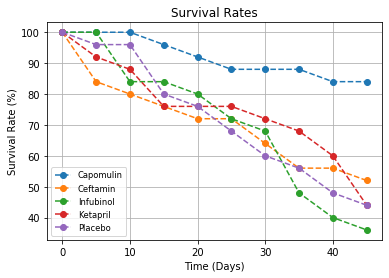

In [10]:
# Generate the Plot (Accounting for percentages)
plt.title("Survival Rates")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)
time = np.arange(0,40,5)
plt.plot((reformated_mouse["Capomulin"]/25)*100, label = "Capomulin", linestyle = "--", marker = "o")
plt.plot((reformated_mouse["Ceftamin"]/25)*100, label = "Ceftamin", linestyle = "--", marker = "o")
plt.plot((reformated_mouse["Infubinol"]/25)*100, label = "Infubinol", linestyle = "--", marker = "o")
plt.plot((reformated_mouse["Ketapril"]/25)*100, label = "Ketapril", linestyle = "--", marker = "o")
plt.plot((reformated_mouse["Placebo"]/25)*100, label = "Placebo", linestyle = "--", marker = "o")

plt.legend(loc="best", fontsize="small")

# Save the Figure
plt.savefig("Survival_Rates.png")
# Show the Figure
plt.show

In [11]:
# Calculate the percent changes for each drug
percent_change = ((reformat_data.iloc[-1]-reformat_data.iloc[0])/45)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

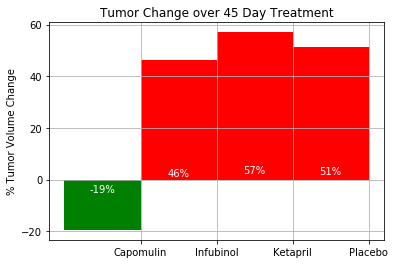

In [12]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = (percent_change["Capomulin"],
                percent_change["Ketapril"],
                percent_change["Infubinol"],
                percent_change["Placebo"]
                )

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
failing = ax.bar([0],percent_change[["Capomulin"]], width = -1, color = "green",align = "edge")
passing = ax.bar([1,2,3],percent_change[["Infubinol","Ketapril","Placebo"]], width = -1, color = "red", align = "edge")
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change over 45 Day Treatment")
ax.grid()
plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")
autolabel(passing)
autolabel(failing)

# Call functions to implement the function calls

# Save the Figure
plt.savefig("Tumor_volume_change.png")

# Show the Figure
fig.show()